In [3]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(dplyr)
library(stats)
library(tidyverse)
library(lubridate)
library(forecast)

### part 1:

In [6]:
df <- read.csv('/content/sample_data/BTC_1d_from_2017_to_2023.csv')
df

Date,Open,High,Low,Close,Volume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01,963.658,1003.080,958.699,998.325,147775008
2017-01-02,998.617,1031.390,996.702,1021.750,222184992
2017-01-03,1021.600,1044.080,1021.600,1043.840,185168000
2017-01-04,1044.400,1159.420,1044.400,1154.730,344945984
2017-01-05,1156.730,1191.100,910.417,1013.380,510199008
2017-01-06,1014.240,1046.810,883.944,902.201,351876000
2017-01-07,903.487,908.585,823.556,908.585,279550016
2017-01-08,908.175,942.724,887.249,911.199,158715008
2017-01-09,913.244,913.686,879.807,902.828,141876992


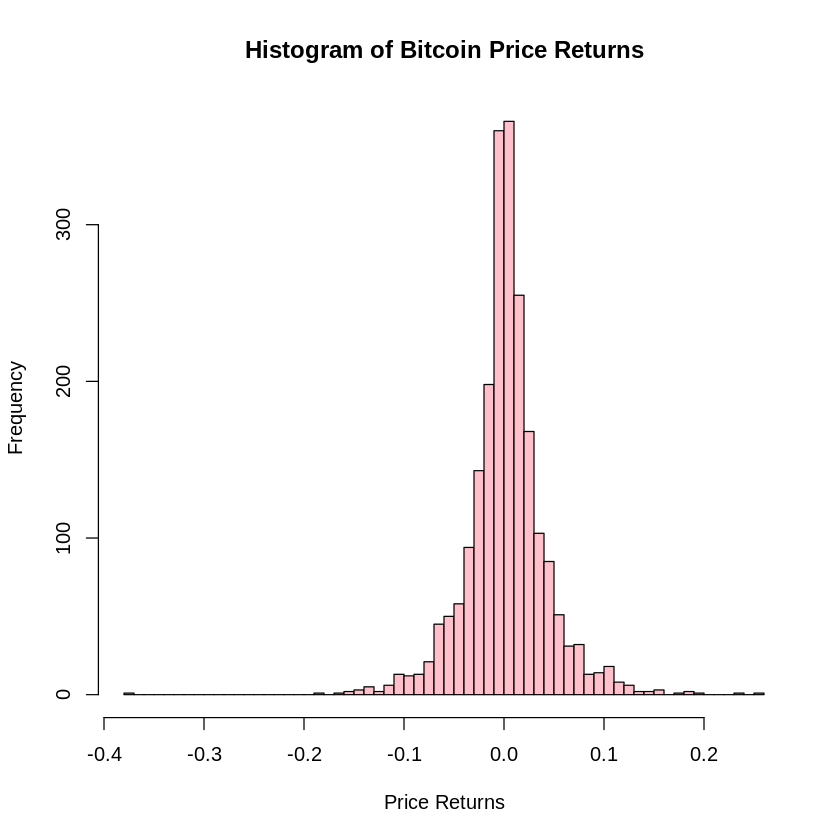

In [7]:
df$returns <- c(0, diff(df$Close) / df$Close[-nrow(df)])

hist(df$returns, breaks = 50, col = "pink", main = "Histogram of Bitcoin Price Returns", xlab = "Price Returns")

In [8]:
df

Date,Open,High,Low,Close,Volume,returns
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01,963.658,1003.080,958.699,998.325,147775008,0.0000000000
2017-01-02,998.617,1031.390,996.702,1021.750,222184992,0.0234642902
2017-01-03,1021.600,1044.080,1021.600,1043.840,185168000,0.0216197366
2017-01-04,1044.400,1159.420,1044.400,1154.730,344945984,0.1062327735
2017-01-05,1156.730,1191.100,910.417,1013.380,510199008,-0.1224095485
2017-01-06,1014.240,1046.810,883.944,902.201,351876000,-0.1097110813
2017-01-07,903.487,908.585,823.556,908.585,279550016,0.0070760654
2017-01-08,908.175,942.724,887.249,911.199,158715008,0.0028769489
2017-01-09,913.244,913.686,879.807,902.828,141876992,-0.0091867659


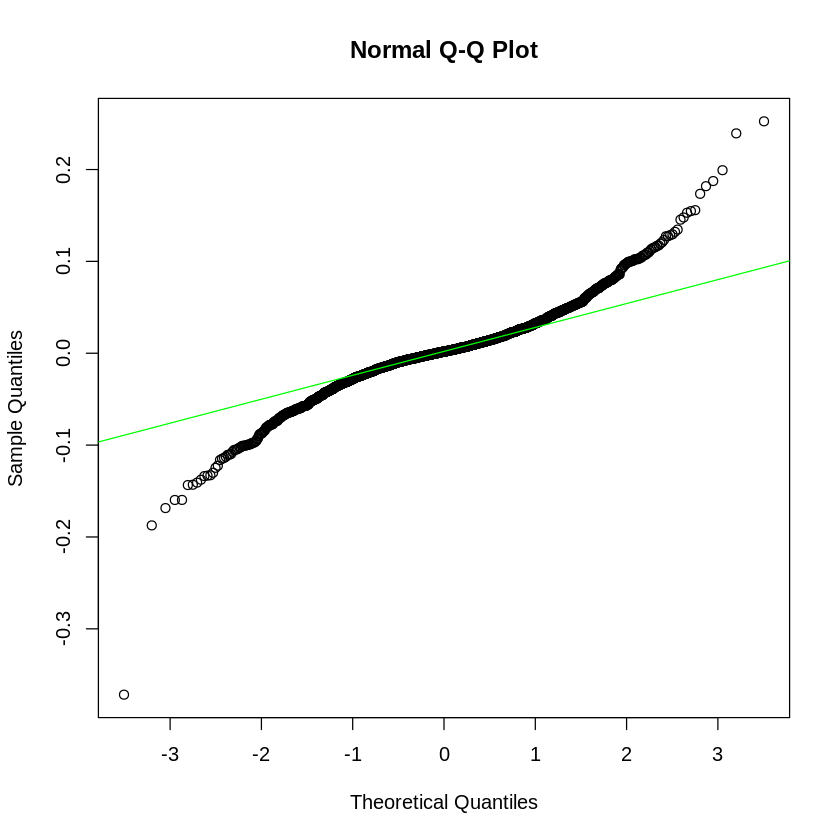

In [9]:
qqnorm(df$returns)
qqline(df$returns, col = 'green')

### part 2:

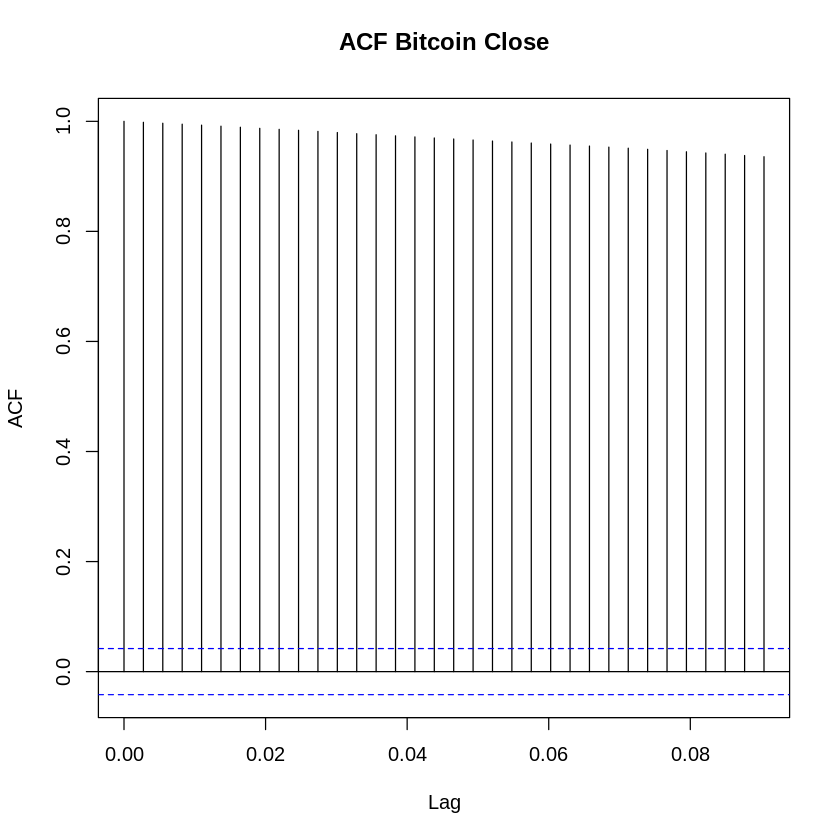

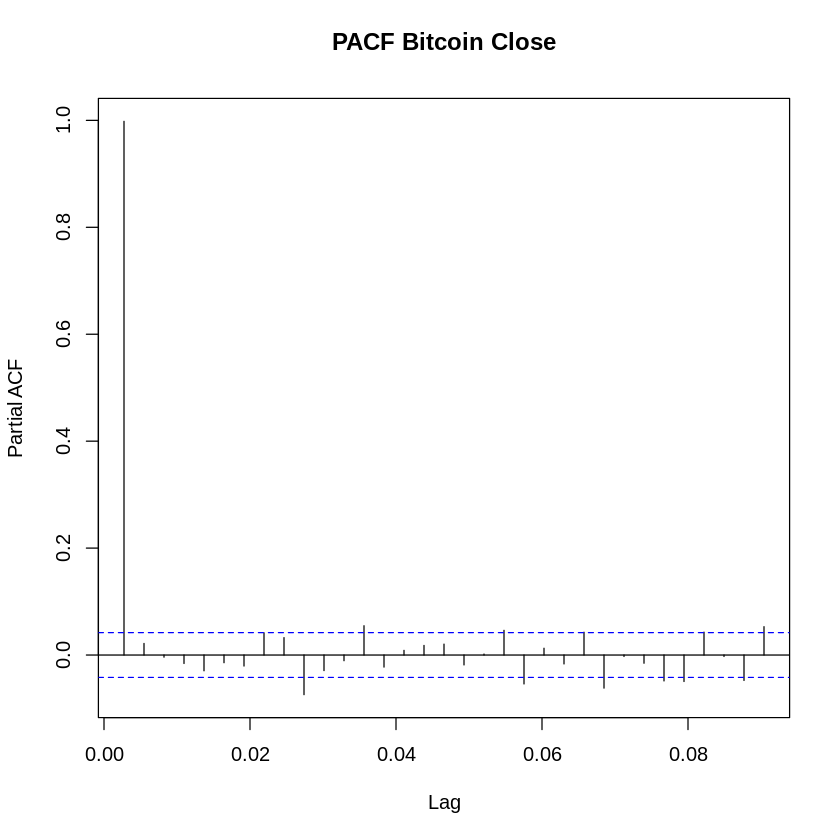

In [10]:
df$Date <- ymd(df$Date)
ts <- ts(df$Close, frequency = 365)

acf(ts, main="ACF Bitcoin Close")
pacf(ts, main="PACF Bitcoin Close")

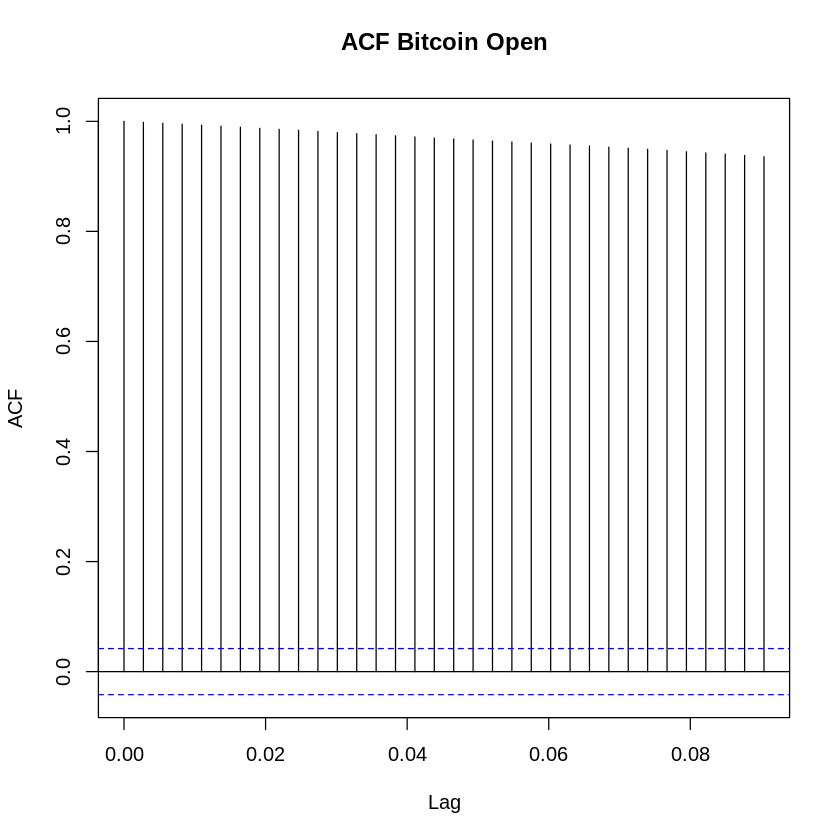

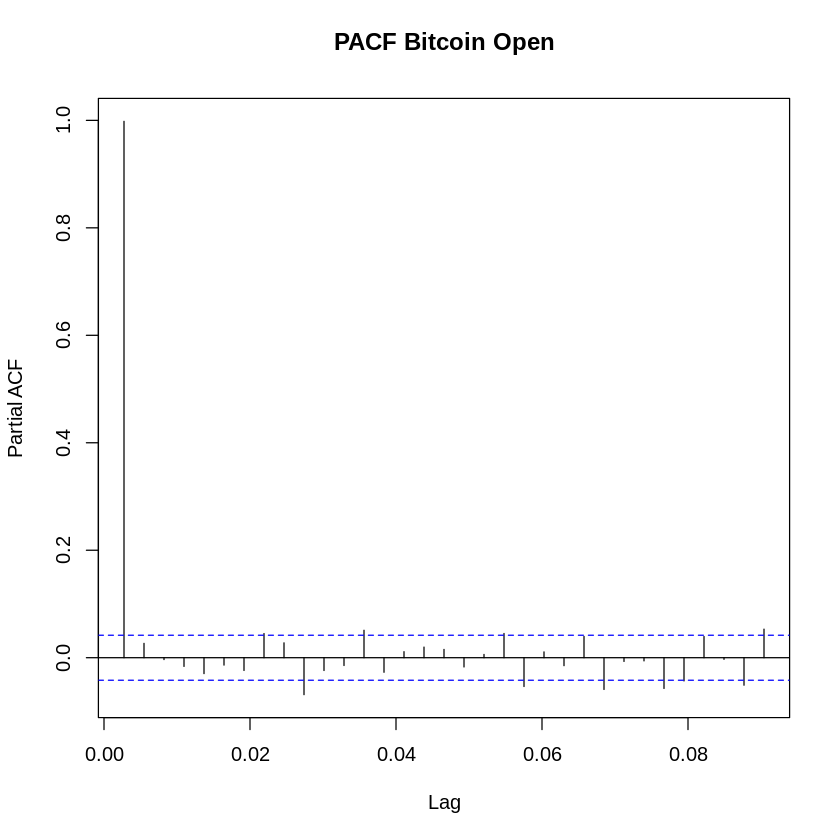

In [11]:
ts <- ts(df$Open, frequency = 365)

acf(ts, main="ACF Bitcoin Open")
pacf(ts, main="PACF Bitcoin Open")

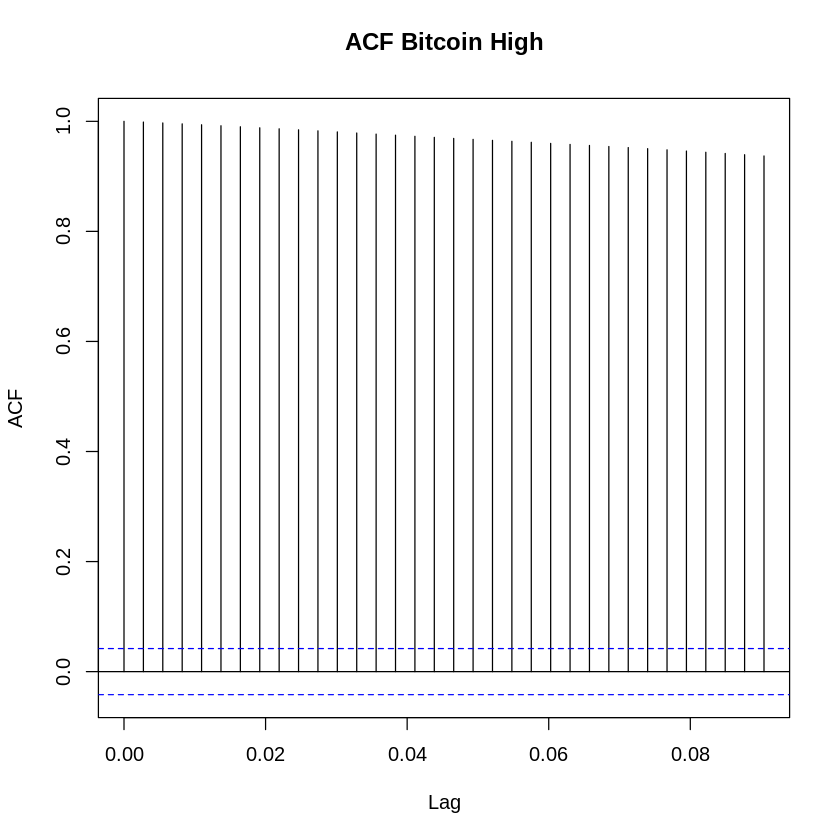

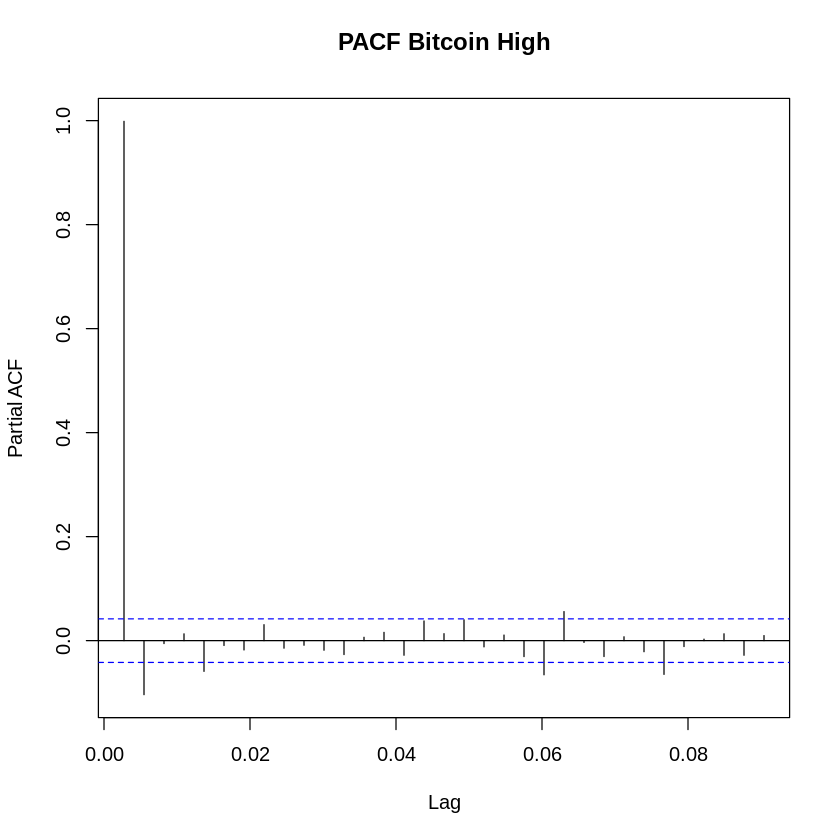

In [12]:
ts <- ts(df$High, frequency = 365)

acf(ts, main="ACF Bitcoin High")
pacf(ts, main="PACF Bitcoin High")

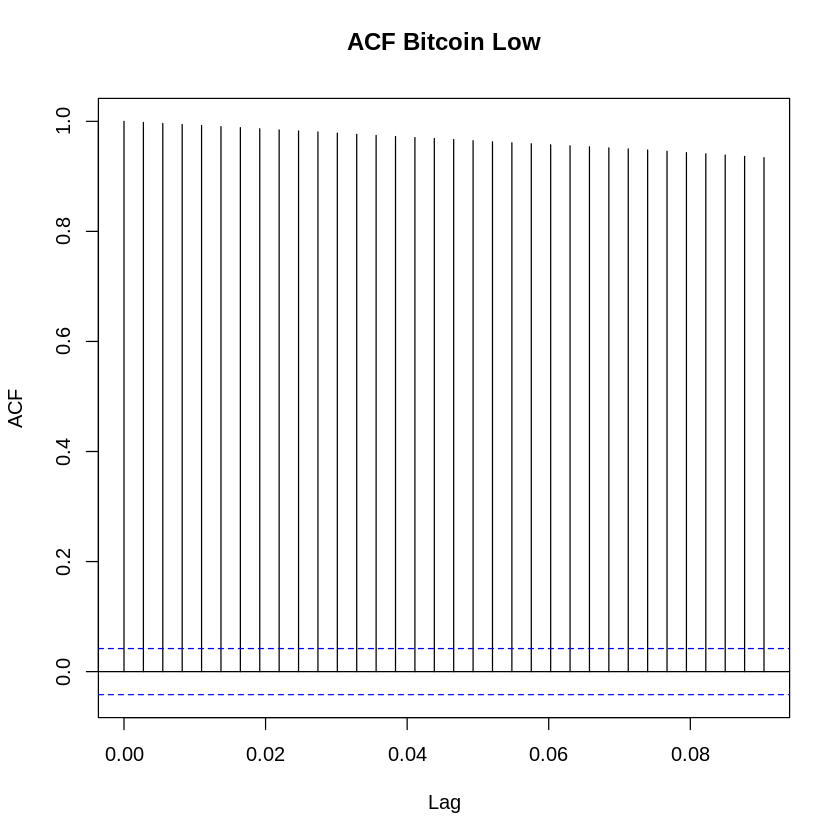

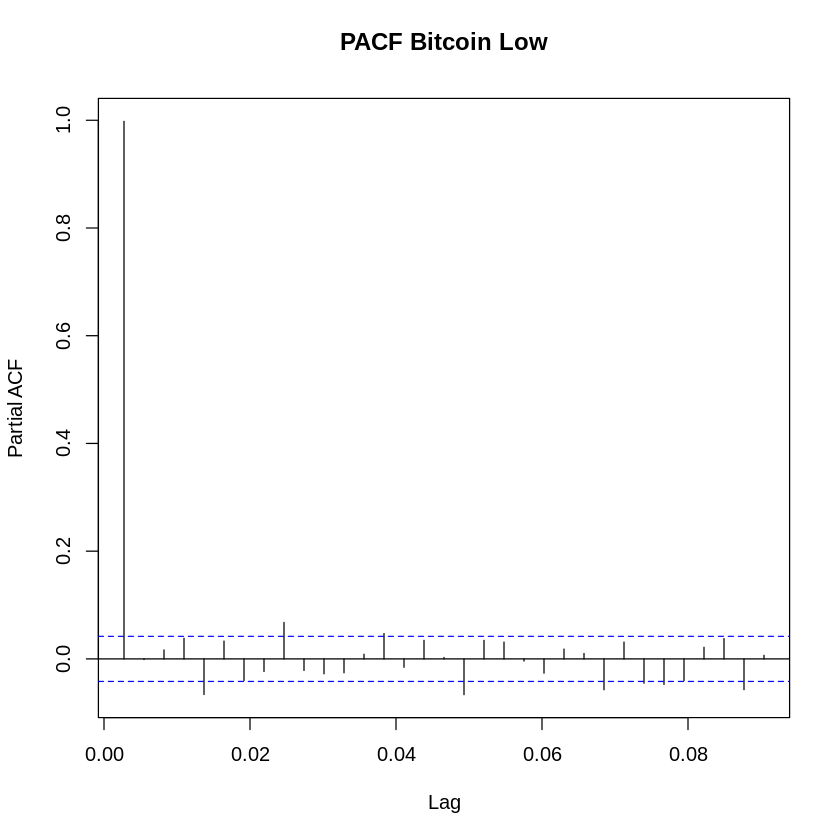

In [13]:
ts <- ts(df$Low, frequency = 365)

acf(ts, main="ACF Bitcoin Low")
pacf(ts, main="PACF Bitcoin Low")

### part 5:

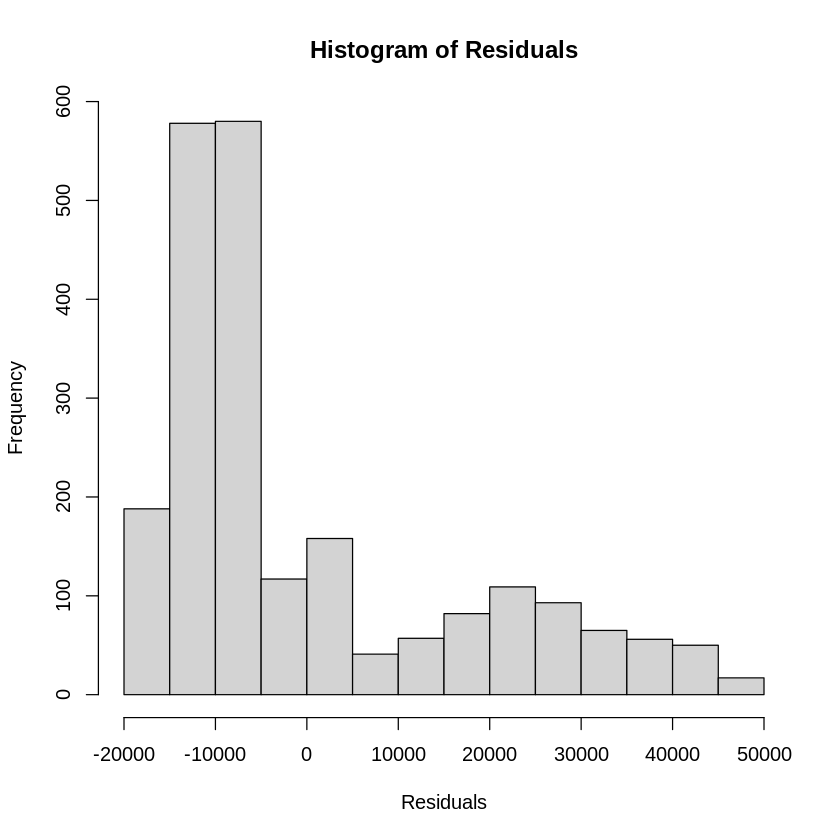

In [16]:
model <- lm(Close ~ 1, data = df)

hist(model$residuals, xlab = "Residuals", main = "Histogram of Residuals")

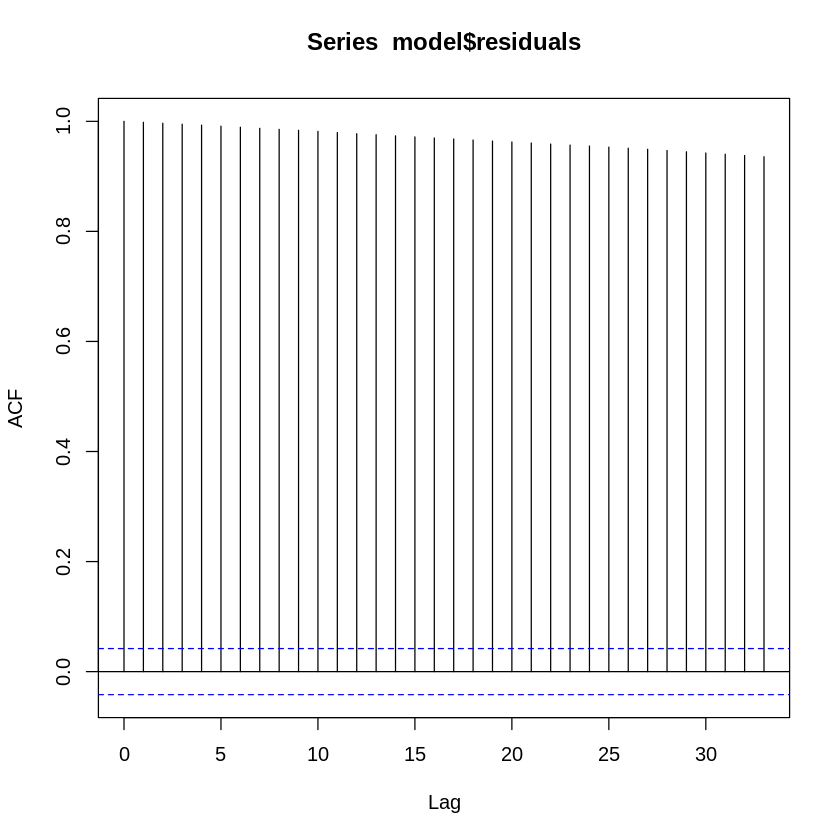

In [17]:
acf(model$residuals)